In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df1 = pd.read_csv('finalcleandatasql.csv')

In [3]:
dfprefund = df1[(df1['countyear'] == 1980) | (df1['countyear'] == 1981)]
dfpostfund = df1[(df1['countyear'] == 1982) | (df1['countyear'] == 1983)]
df1980 = df1[(df1['countyear'] == 1980)]
df1981 = df1[(df1['countyear'] == 1981)]
df1982 = df1[(df1['countyear'] == 1982)]
df1983 = df1[(df1['countyear'] == 1983)]

In [4]:
df1

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [5]:
df1980.describe().to_csv("1980summarystatistics")
df1981.describe().to_csv("1981summarystatistics")
df1982.describe().to_csv("1982summarystatistics")
df1983.describe().to_csv("1983summarystatistics")

In [6]:
dfwithoutdc = df1[df1['statefip'] != 11] 

In [7]:
dfwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [8]:
dfprefund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [9]:
dfpostfund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [10]:
dfprefundwithoutdc = dfprefund[dfprefund['statefip'] != 11] 

In [11]:
dfpostfundwithoutdc = dfpostfund[dfpostfund['statefip'] != 11] 

In [12]:
dfprefundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [13]:
dfpostfundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [14]:
X1 = df1.iloc[:,3].values.reshape(-1, 1)
X2 = df1.iloc[:,4].values.reshape(-1, 1)
X3 = dfwithoutdc.iloc[:,3].values.reshape(-1, 1)
X4 = dfwithoutdc.iloc[:,4].values.reshape(-1, 1)
X5 = dfprefundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X6 = dfprefundwithoutdc.iloc[:,4].values.reshape(-1, 1)
X7 = dfpostfundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X8 = dfpostfundwithoutdc.iloc[:,4].values.reshape(-1, 1)
Y1 = df1.iloc[:,21].values.reshape(-1, 1)
Y2 = df1.iloc[:,22].values.reshape(-1, 1)
Y3 = dfwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y4 = dfwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y5 = dfprefundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y6 = dfprefundwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y7 = dfpostfundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y8 = dfpostfundwithoutdc.iloc[:,22].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)
linear_regressor.fit(X1, Y2)
linear_regressor.fit(X2, Y1)
linear_regressor.fit(X2, Y2)
linear_regressor.fit(X3, Y3)
linear_regressor.fit(X3, Y4)
linear_regressor.fit(X4, Y3)
linear_regressor.fit(X4, Y4)
linear_regressor.fit(X5, Y5)
linear_regressor.fit(X5, Y6)
linear_regressor.fit(X6, Y5)
linear_regressor.fit(X6, Y6)
linear_regressor.fit(X7, Y7)
linear_regressor.fit(X7, Y8)
linear_regressor.fit(X8, Y7)
linear_regressor.fit(X8, Y8)
Y_predv1 = linear_regressor.predict(X1) 
Y_predp1 = linear_regressor.predict(X1) 
Y_predv2 = linear_regressor.predict(X2)
Y_predp2 = linear_regressor.predict(X2) 
Y_predv3 = linear_regressor.predict(X3)
Y_predp3 = linear_regressor.predict(X3) 
Y_predv4 = linear_regressor.predict(X4)
Y_predp4 = linear_regressor.predict(X4) 
Y_predv5 = linear_regressor.predict(X5)
Y_predp5 = linear_regressor.predict(X5) 
Y_predv6 = linear_regressor.predict(X6)
Y_predp6 = linear_regressor.predict(X6) 
Y_predv7 = linear_regressor.predict(X7)
Y_predp7 = linear_regressor.predict(X7) 
Y_predv8 = linear_regressor.predict(X8) 
Y_predp8 = linear_regressor.predict(X8) 

In [15]:
X1, X2, Y1, Y2

(array([[ 8066],
        [12505],
        [ 9505],
        [ 8145],
        [10179],
        [10773],
        [10495],
        [ 9571],
        [10636],
        [ 8678],
        [ 9241],
        [10014],
        [ 9218],
        [10230],
        [ 9500],
        [ 9444],
        [ 9639],
        [ 8597],
        [ 8670],
        [ 8182],
        [10685],
        [ 9662],
        [10013],
        [ 9662],
        [ 8202],
        [ 9305],
        [ 9191],
        [ 8993],
        [10290],
        [ 9730],
        [ 9923],
        [ 8656],
        [ 9338],
        [ 8835],
        [ 8970],
        [ 9793],
        [ 9018],
        [ 9636],
        [ 9260],
        [ 9489],
        [ 8283],
        [ 8692],
        [ 8545],
        [ 9270],
        [ 9720],
        [ 8764],
        [10055],
        [10547],
        [ 8294],
        [ 9830],
        [10497],
        [ 8974],
        [13525],
        [10459],
        [ 8642],
        [11056],
        [11175],
        [11126],
        [10626

In [16]:
v1 = sm.add_constant(X1)
v2 = sm.add_constant(X2)
v3 = sm.add_constant(X3)
v4 = sm.add_constant(X4)
v5 = sm.add_constant(X5)
v6 = sm.add_constant(X6)
v7 = sm.add_constant(X7)
v8 = sm.add_constant(X8)

Text(0.5, 1.0, 'All violent crime rates vs average incomes')

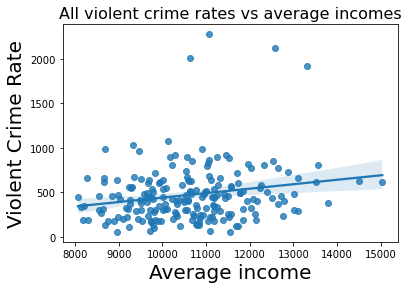

In [17]:
p1 = sns.regplot(x=X1,y=Y1)
p1.set_xlabel("Average income", fontsize = 20)
p1.set_ylabel("Violent Crime Rate", fontsize = 20)
p1.set_title("All violent crime rates vs average incomes", fontsize = 16)

From this plot, we can see there is an outlier which is DC.

Text(0.5, 1.0, 'All property crime rates vs average incomes')

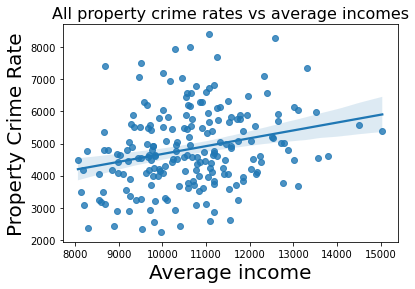

In [18]:
p2 = sns.regplot(x=X1,y=Y2)
p2.set_xlabel("Average income", fontsize = 20)
p2.set_ylabel("Property Crime Rate", fontsize = 20)
p2.set_title("All property crime rates vs average incomes", fontsize = 16)

From this plot, we can see DC is not an outlier.

Text(0.5, 1.0, 'All violent crime rates vs Gini coefficients')

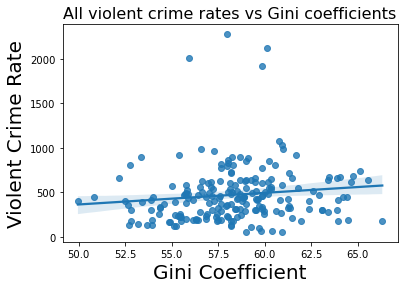

In [19]:
p3 = sns.regplot(x=X2,y=Y1)
p3.set_xlabel("Gini Coefficient", fontsize = 20)
p3.set_ylabel("Violent Crime Rate", fontsize = 20)
p3.set_title("All violent crime rates vs Gini coefficients", fontsize = 16)

From this plot, we can see DC is an outlier for violent crime once again. This means it is best to do our analysis for violent crime without DC altogether as it would skew the results. It is hypothesized DC would have significantly higher violent crime anyway due to the significantly higher population density. I also think the reason it is not an outlier for property crime is because of the significantly higher mean income compared to the other states.

Text(0.5, 1.0, 'All property crime rates vs Gini coefficients')

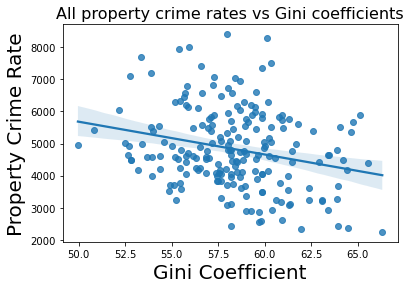

In [20]:
p4 = sns.regplot(x=X2,y=Y2)
p4.set_xlabel("Gini Coefficient", fontsize = 20)
p4.set_ylabel("Property Crime Rate", fontsize = 20)
p4.set_title("All property crime rates vs Gini coefficients", fontsize = 16)

As hypothesized, DC is not an outlier for property crime.

Text(0.5, 1.0, 'All violent crime rates vs average incomes besides DC')

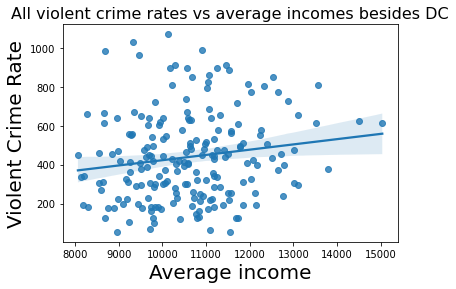

In [21]:
p5 = sns.regplot(x=X3,y=Y3)
p5.set_xlabel("Average income", fontsize = 20)
p5.set_ylabel("Violent Crime Rate", fontsize = 20)
p5.set_title("All violent crime rates vs average incomes besides DC", fontsize = 16)

It can be argued there is a weak positive correlation here although p-values need to be seen to comprehend it better.

Text(0.5, 1.0, 'All violent crime rates vs Gini coefficients besides DC')

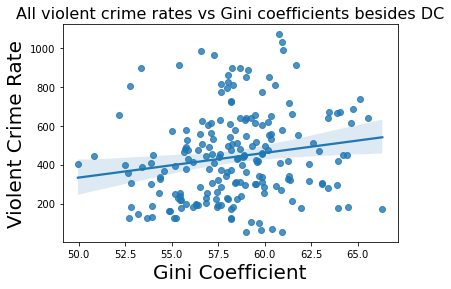

In [22]:
p6 = sns.regplot(x=X4,y=Y3)
p6.set_xlabel("Gini Coefficient", fontsize = 20)
p6.set_ylabel("Violent Crime Rate", fontsize = 20)
p6.set_title("All violent crime rates vs Gini coefficients besides DC", fontsize = 16)

Text(0.5, 1.0, 'All property crime rates vs Average incomes besides DC')

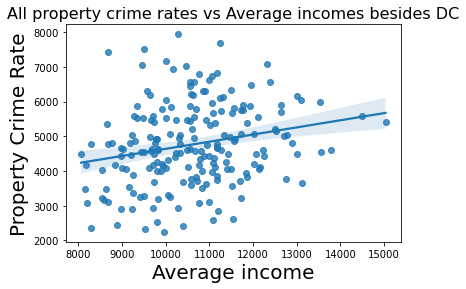

In [23]:
p7 = sns.regplot(x=X3,y=Y4)
p7.set_xlabel("Average income", fontsize = 20)
p7.set_ylabel("Property Crime Rate", fontsize = 20)
p7.set_title("All property crime rates vs Average incomes besides DC", fontsize = 16)

Text(0.5, 1.0, 'All property crime rates vs Gini coefficients besides DC')

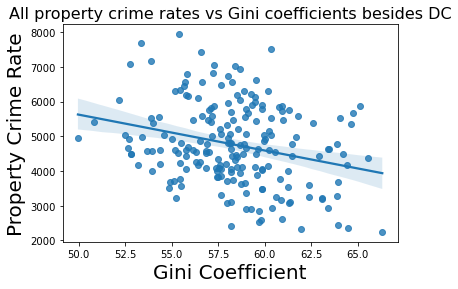

In [24]:
p8 = sns.regplot(x=X4,y=Y4)
p8.set_xlabel("Gini Coefficient", fontsize = 20)
p8.set_ylabel("Property Crime Rate", fontsize = 20)
p8.set_title("All property crime rates vs Gini coefficients besides DC", fontsize = 16)

Text(0.5, 1.0, '1980-81 violent crime rates vs Average incomes besides DC')

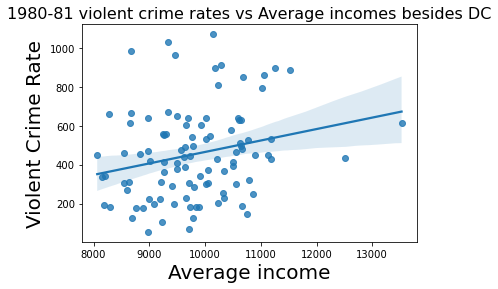

In [25]:
p9 = sns.regplot(x=X5,y=Y5)
p9.set_xlabel("Average income", fontsize = 20)
p9.set_ylabel("Violent Crime Rate", fontsize = 20)
p9.set_title("1980-81 violent crime rates vs Average incomes besides DC", fontsize = 16)

Text(0.5, 1.0, '1980-81 property crime rates vs Average incomes besides DC')

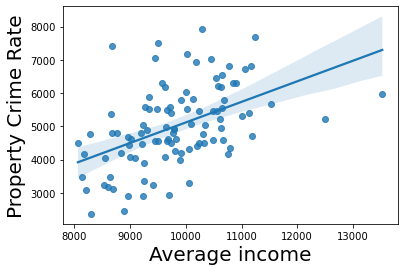

In [26]:
p10 = sns.regplot(x=X5,y=Y6)
p10.set_xlabel("Average income", fontsize = 20)
p10.set_ylabel("Property Crime Rate", fontsize = 20)
p9.set_title("1980-81 property crime rates vs Average incomes besides DC", fontsize = 16)

Text(0.5, 1.0, '1980-81 violent crime rates vs Gini coefficients besides DC')

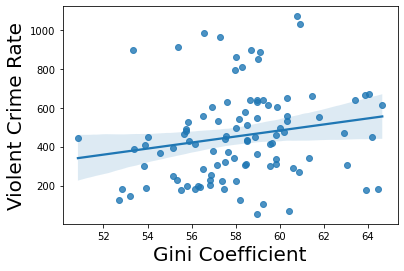

In [27]:
p11 = sns.regplot(x=X6,y=Y5)
p11.set_xlabel("Gini Coefficient", fontsize = 20)
p11.set_ylabel("Violent Crime Rate", fontsize = 20)
p9.set_title("1980-81 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

Text(0.5, 1.0, '1980-81 property crime rates vs Gini coefficients besides DC')

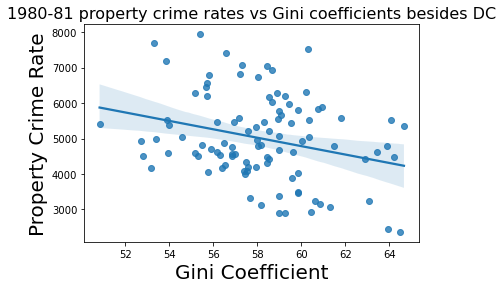

In [28]:
p12 = sns.regplot(x=X6,y=Y6)
p12.set_xlabel("Gini Coefficient", fontsize = 20)
p12.set_ylabel("Property Crime Rate", fontsize = 20)
p12.set_title("1980-81 property crime rates vs Gini coefficients besides DC", fontsize = 16)

Text(0.5, 1.0, '1982-83 violent crime rates vs Average Incomes besides DC')

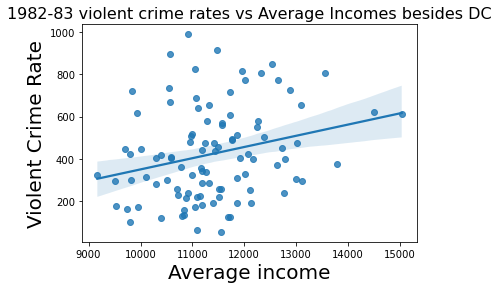

In [29]:
p13 = sns.regplot(x=X7,y=Y7)
p13.set_xlabel("Average income", fontsize = 20)
p13.set_ylabel("Violent Crime Rate", fontsize = 20)
p13.set_title("1982-83 violent crime rates vs Average Incomes besides DC", fontsize = 16)

Text(0.5, 1.0, '1982-83 property crime rates vs Average Incomes besides DC')

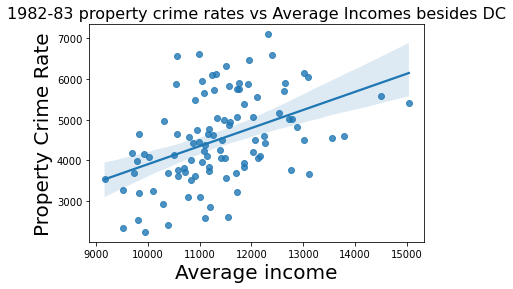

In [30]:
p14 = sns.regplot(x=X7,y=Y8)
p14.set_xlabel("Average income", fontsize = 20)
p14.set_ylabel("Property Crime Rate", fontsize = 20)
p14.set_title("1982-83 property crime rates vs Average Incomes besides DC", fontsize = 16)

Text(0.5, 1.0, '1982-83 violent crime rates vs Gini coefficients besides DC')

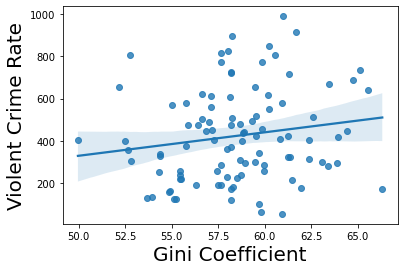

In [31]:
p15 = sns.regplot(x=X8,y=Y7)
p15.set_xlabel("Gini Coefficient", fontsize = 20)
p15.set_ylabel("Violent Crime Rate", fontsize = 20)
p14.set_title("1982-83 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

Text(0.5, 1.0, '1982-83 property crime rates vs Gini coefficients besides DC')

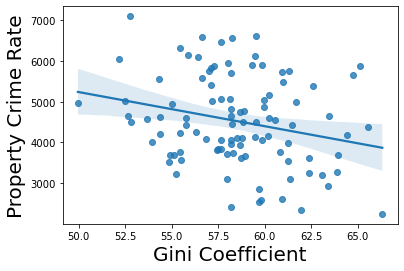

In [32]:
p16 = sns.regplot(x=X8,y=Y8)
p16.set_xlabel("Gini Coefficient", fontsize = 20)
p16.set_ylabel("Property Crime Rate", fontsize = 20)
p14.set_title("1982-83 property crime rates vs Gini coefficients besides DC", fontsize = 16)

In [33]:
res1 = sm.OLS(df1['propertycrime'], v1).fit()
res2 = sm.OLS(df1['propertycrime'], v2).fit()
res3 = sm.OLS(df1['violentcrime'], v1).fit()
res4 = sm.OLS(df1['violentcrime'], v2).fit()
res5 = sm.OLS(dfwithoutdc['propertycrime'], v3).fit()
res6 = sm.OLS(dfwithoutdc['propertycrime'], v4).fit()
res7 = sm.OLS(dfwithoutdc['violentcrime'], v3).fit()
res8 = sm.OLS(dfwithoutdc['violentcrime'], v4).fit()
res9 = sm.OLS(dfprefundwithoutdc['propertycrime'], v5).fit()
res10 = sm.OLS(dfprefundwithoutdc['propertycrime'], v6).fit()
res11 = sm.OLS(dfprefundwithoutdc['violentcrime'], v5).fit()
res12 = sm.OLS(dfprefundwithoutdc['violentcrime'], v6).fit()
res13 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v7).fit()
res14 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v8).fit()
res15 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v7).fit()
res16 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v8).fit()

In [34]:
resultslist = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11,res12,res13,res14,res15,res16]

In [35]:
for x in resultslist:
    z = x.params
    print(z)

const    2226.994155
x1          0.244729
dtype: float64
const    10776.009686
x1        -101.957185
dtype: float64
const   -61.109092
x1        0.050080
dtype: float64
const   -289.108835
x1        13.033335
dtype: float64
const    2582.349379
x1          0.205790
dtype: float64
const    10784.320141
x1        -103.196941
dtype: float64
const    152.098091
x1         0.027057
dtype: float64
const   -300.721330
x1        12.681063
dtype: float64
const   -1068.412354
x1          0.618589
dtype: float64
const    11913.409888
x1        -118.778514
dtype: float64
const   -123.871425
x1         0.058881
dtype: float64
const   -447.444624
x1        15.503584
dtype: float64
const   -542.936045
x1         0.444874
dtype: float64
const    9416.134698
x1        -83.620689
dtype: float64
const   -180.802724
x1         0.053082
dtype: float64
const   -225.114860
x1        11.090759
dtype: float64


In [36]:
for x in resultslist:
    z = x.pvalues
    print(z)

const    0.001889
x1       0.000273
dtype: float64
const    5.955178e-10
x1       4.066881e-04
dtype: float64
const    0.739551
x1       0.003887
dtype: float64
const    0.506814
x1       0.081443
dtype: float64
const    0.000193
x1       0.001433
dtype: float64
const    5.418030e-11
x1       1.422272e-04
dtype: float64
const    0.252353
x1       0.030357
dtype: float64
const    0.325815
x1       0.016153
dtype: float64
const    3.428625e-01
x1       3.875006e-07
dtype: float64
const    0.000003
x1       0.005126
dtype: float64
const    0.604953
x1       0.016785
dtype: float64
const    0.347950
x1       0.060008
dtype: float64
const    0.609963
x1       0.000006
dtype: float64
const    0.000005
x1       0.013615
dtype: float64
const    0.430415
x1       0.009155
dtype: float64
const    0.573081
x1       0.105846
dtype: float64
